# **CQED**
```

```
*Normalized Cavity Transmission Spectrum*
---
01 Jun 2022

In [ ]:
'''
   To import the different related libraries//
'''
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from matplotlib.ticker import AutoMinorLocator


# *Jaynes-Cummings (JC) Hamiltonian*
\begin{equation}
H = \underbrace{\hbar\omega_a\sigma^+\sigma^-}_{=H_a} + \underbrace{\hbar\omega_ca^†a}_{=H_c} +\underbrace{(- g\hbar(\sigma^+a+  a^\dagger\sigma^-))}_{=H_I} = H_a + H_c + H_I
\end{equation}

$H_a$ is the Hamiltonian for bare atom.

$H_c$ is the Hamiltonian for cavity containing $n$ photons having energy $\hbar\omega_c$.

$H_I$ is the interaction Hamiltonian.

---
> Non-hermitian JC Hamiltonian:
\begin{equation}
H = \hbar\omega_a\sigma^+\sigma^- + \hbar\omega_ca^†a - g\hbar(\sigma^+a+  a^\dagger\sigma^-) -i\hbar\gamma\sigma^+\sigma^--i\hbar\kappa a^\dagger a-i\hbar\eta(ae^{+i\omega_p t}+a^\dagger e^{-i\omega_p t})
\end{equation}
Non-hermitian JC Hamiltonian in rotating frame at probe frequency:
> \begin{equation}
H = \hbar\Delta_{ap}\sigma^+\sigma^- + \hbar\Delta_{cp}a^†a - g\hbar(\sigma^+a+  a^\dagger\sigma^-) -i\hbar\gamma\sigma^+\sigma^--i\hbar\kappa a^\dagger a-i\hbar\eta(a+a^\dagger)
\end{equation}
$\Delta_{ap}=\omega_a-\omega_p$ and $\Delta_{cp}=\omega_c-\omega_p$.

---
Normalized cavity transmission spectrum:
\begin{equation}
\frac{T}{T_0} = \bigg(\frac{\kappa}{\eta}\bigg)^2\langle n\rangle=\frac{\kappa^2(\Delta_{ap}^2+\gamma^2)}{(\Delta_{cp}\gamma+\Delta_{ap}\kappa)^2+(g^2+\gamma\kappa-\Delta_{ap}\Delta_{cp})^2}
\end{equation}

The mean number of photons at resonance condition $(\Delta_{ap}=\Delta_{cp}=0)$ in empty cavity $(g=0)$ is $T_0 = \big(\frac{\eta}{\kappa}\big)^2$.

In [ ]:
''' Input parameters '''
cav_spec_array = []; # Vector initialization//
delta_ap = np.linspace(-70, 70, 200); '''probe-atom detuning (in MHz)'''; delta_ca = 0; delta_cp = delta_ap + delta_ca;
g_list = {0, 34}; kappa = 5; gamma = 4; # All are in MHz units//

for i in g_list:
  def cav_spec(g, kappa, gamma, delta_ap, delta_cp):
    return ((kappa**2*(delta_ap**2 + gamma**2))/((delta_cp*gamma + delta_ap*kappa)**2 + (g**2 + gamma*kappa - delta_ap*delta_cp)**2));
  cav_spec_values = cav_spec(i, kappa, gamma, delta_ap, delta_cp);
  cav_spec_array.append(cav_spec_values)


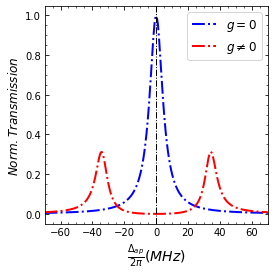

In [ ]:
'''
    Plotting//
'''
fig, ax = plt.subplots(figsize = (4, 4));  
ax.plot(delta_ap, cav_spec_array[0], 'b-.', label = r'$g=0$', linewidth = 2.0);
ax.plot(delta_ap, cav_spec_array[1], 'r-.', label = r'$g\neq0$', linewidth = 2.0); 
plt.axvline(x = 0.0, ymin = 0.0, ymax = 1, linewidth = 1.0, color='k', linestyle = '-.');
ax.set_xlabel(r'$\frac{\Delta_{ap}}{2\pi}(MHz)$', fontsize = 14); ax.set_ylabel(r'$Norm. Transmission$', fontsize = 12); # Axis labelling//
ax.tick_params(which = "both", axis = "x", direction ="in", bottom = True, 
               top = True); ax.tick_params(which = "both", axis = "y", direction = "in", left = True, right = True); # x-axis and y-axis ticks for 
               # both major and minor and on left(right) and up(down)//
start_x, end_x = ax.set_xlim(delta_ap[0], delta_ap[len(delta_ap) - 1]); #start_y, end_y = ax.set_ylim(0, 1); # x-axis and y-axis limiting//
ax.xaxis.set_minor_locator(AutoMinorLocator()); ax.yaxis.set_minor_locator(AutoMinorLocator()); 
ax.legend(loc='upper right', prop={"size":12});
